# Aufgabenblatt 4

<p style="border-left:5px solid red;padding:0.6em;box-sizing:border-box;">
<strong>Lernziele:</strong><br/>
    In dieser Übung beschäftigen wir uns mit Messfehlern, sowie der Gaussschen Fehlerfortpflanzung.
</p>

<p style="border-left:5px solid blue;padding:0.6em;box-sizing:border-box;">
<strong>Wichtigste neuen Funktionen für diese Übung:</strong><br/>
    Dies sind die wichtigsten Funktionen die sie während dieser Übung benötigen:<br>
    Die jeweilige Syntax beschreibt eine examplarische Verwendung. Im allgemeinen haben die Funktionen weitere Argumente die übergeben werden können. Der Funktionsname ist jeweils ein Link zur offiziellen Dokumentation, welche alle Argumente darlegt und ihre Funktion beschreibt. <br>
    <b>Funktionen zur statistischen Analyse: </b><br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.logspace.html">numpy.logspace(start, stop, num_samples)</a> Erstellt ein Array mit <em>num_samples</em> Einträgen zwischen <em>start</em> und <em>stop</em>. Die Werte sind dabei gleichmässig auf einer logarithmischen Skala verteilt.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html">numpy.mean(data)</a> Berechnet den Mittelwert aller Werte im Array <em>data</em>. <br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html">numpy.std(data)</a> Berechnet die Standardabweichung aller Werte im Array <em>data</em>. <br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html">hist = numpy.histogram(data, number_of_bins)</a> Sortiert die Daten <em>data</em> in <em>number_of_bins</em> gleichgrossen Bins auf. Der Rückgabewert ist ein Array, welches die Grenzen sowie die Population der Bins enthält.<br>
    <b>Funktionen zum Plotten: </b><br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogx.html">axis.semilogx(x, y)</a> Plotted die Daten x,y in einem Graphen. Die x-Achse ist dabei in logarithmischer Basis dargestellt.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yscale.html">axis.set_yscale({"linear", "log"})</a> Ändere die Darstellungsweise der y-Achse zu einer linearen oder logarithmischen Skala.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html">axis.axhline(y=1)</a> Füge eine horizontale Linie dem aktuellen Graphen hinzu. In diesem Fall bei y = 1.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html">axis.errorbar(x, y, xerr, yerr)</a> Plotte die Datenpunkte in den Arrays x,y. Die jeweiligen Punkte erhalten Fehlerbalken, dessen Grössen in den Arrays xerr und yerr definiert sind.<br>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 1 Fehler des Mittelwertes

Wie Sie in der Vorlesung gesehen haben, kann der Fehler des Mittelwertes reduziert werden, indem mehr Datenpunkte gesammelt werden. Er hängt also damit zusammen, wie viel Information man über die Normalverteilung hat, und je mehr Datenpunkte man hat, desto genauer gleicht die Verteilung der Daten der Normalverteilung. Obwohl die Unsicherheit der einzelnen Datenpunkte gegebenenfalls gross sein kann, kann also die Unsicherheit des Mittelwertes beliebig klein werden. 

In dieser Aufgabe untersuchen Sie den Mittelwert und dessen Fehler als Funktion der Anzahl Datenpunkte und vergleichen Ihr Ergebnis mit den Histogrammen der Datenpunkte.

## a)

Laden Sie dazu zuerst den Datensatz `ExampleData.txt`.

In [97]:
data = np.loadtxt('ExampleData.txt')

## b)

Als nächstes berechnen Sie den Mittelwert, die Standardabweichung  und den Fehler des Mittelwerts als Funktion der Anzahl der berücksichtigten Datenpunkte und stellen diese grafisch dar. Nehmen sie dazu zuerst nur die ersten $n=10$ Punkte des Datensatzes und berechnen Sie davon den Mittelwert $\bar{x}_n$, die Standardabweichung $\sigma$ und den theoretisch erwarteten Fehler des Mittelwertes $\sigma_{\bar{x}_n}$. Wiederholen Sie dies für zunehmende $n$, bis Sie schliesslich alle Datenpunkte berücksichtigen. 
Speichern Sie die berechneten Werte für jedes $n$ in einem Array, so dass Sie am Ende alles als Funktion von $n$ plotten können.
Vergleichen Sie auch den theoretisch erwarteten Fehler mit der Abweichung von $\bar{x}_n$ zum echten Mittelwert $\mu$, der für diesen Datensatz $\mu=5$ ist. 

Da es sich hier um mehrere Grössenordnungen handelt, ist es vorteilhaft, mit `np.logspace` die Anzahl Punkte zu definieren und mit `ax.semilogx` die Resultate zu plotten.

In [98]:
means = np.zeros(len(data))
stds = np.zeros(len(data))
eotms = np.zeros(len(data))

for i in range(len(data)):
    means[i] = np.mean(data[:i+1])
    stds[i] = np.std(data[:i+1])
    eotms[i] = stds[i] / np.sqrt(i+1)

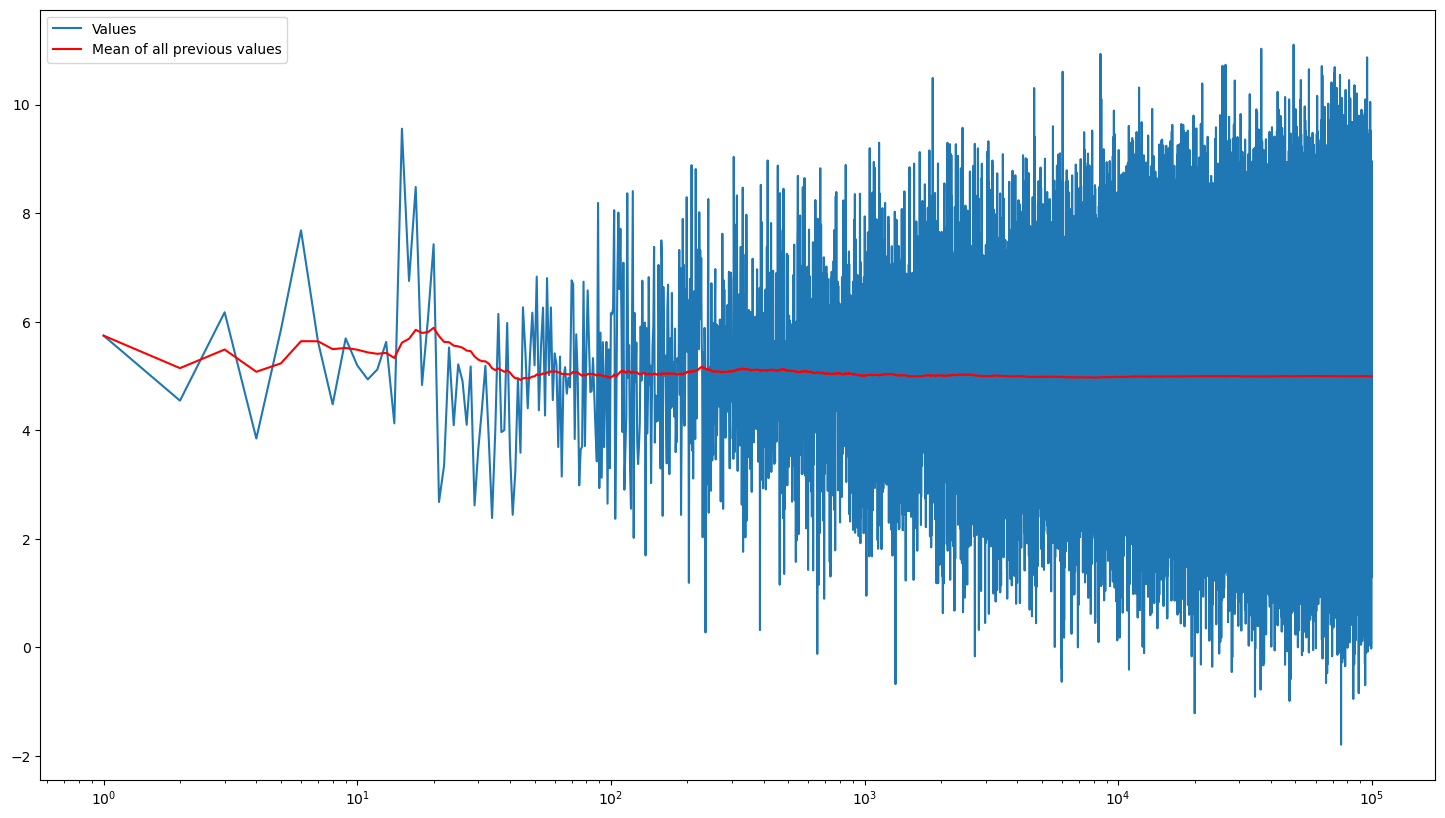

In [101]:
fig, ax = plt.subplots(figsize=(18,10))
xaxis = range(1, len(data)+1)
ax.semilogx(xaxis, data, label='Values')
ax.semilogx(xaxis, means, color='red', label='Mean of all previous values')
#ax.axhline(y=5, color='darkred', label='Expected Mean')
#ax.semilogx(xaxis, 5+eotms, color='green')
#ax.semilogx(xaxis, 5-eotms, color='green')
#ax.semilogx(xaxis, stds)
ax.legend()

## c)

Vergleichen Sie die Mittelwerte und deren Unsicherheiten mit den Verteilungen der Datenpunkte. Plotten sie dazu die Histogramme für 10, 100, 1'000 und 10'000 Punkte und zeichnen Sie die dazugehörigen Mittelwerte mit deren Unsicherheiten ein.

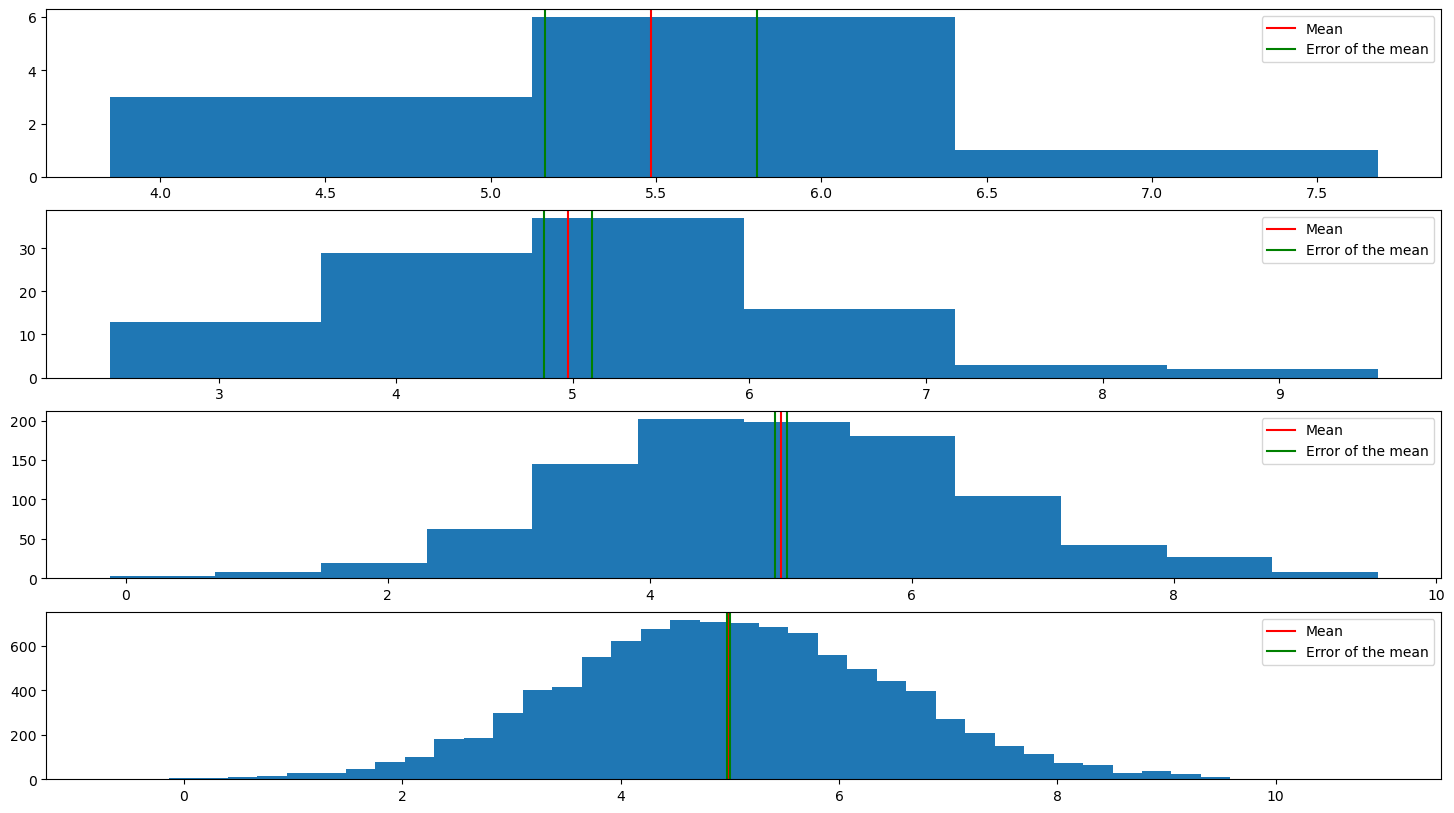

In [103]:
fig, ax = plt.subplots(4, figsize=(18,10))
#bins = np.linspace(0, 10, 50)
for i in range(4):
    ax[i].hist(data[:10**(i+1)], bins='stone')
    ax[i].axvline(x=means[10**(i+1)-1], color='red', label='Mean')
    ax[i].axvline(x=means[10**(i+1)-1] + eotms[10**(i+1)-1], color='green', label='Error of the mean')
    ax[i].axvline(x=means[10**(i+1)-1] - eotms[10**(i+1)-1], color='green')
    ax[i].legend()

# Aufgabe 2 Fehler des Mittelwerts mit Gauss

Leiten Sie die Unsicherheit des Mittelwerts mithilfe der Gaussschen Fehlerfortpflanzung her. Nehmen Sie dazu an, dass alle Datenpunkte die gleiche Unsicherheit $\sigma$ haben.

# Aufgabe 3 Gausssche Fehlerfortpflanzung

In vielen Experimenten wird nicht die gesuchte Grösse direkt gemessen, sondern muss erst aus den gesammelten Daten berechnet werden. In dieser Aufgabe werden Sie die Fehler einer solchen Grösse durch Fehlerfortpflanzung der Unsicherheit normalverteilter Werte berechnen.

Als System betrachten wir dazu eine Masse $m$, die sich mit einer Geschwindigkeit $v$ auf einer Kreisbahn mit Radius $R$ bewegt. Nun soll für verschiedene Geschwindigkeiten die Kraft berechnet werden, mit der die Masse auf der Kreisbahn gehalten wird. Die Geschwindigkeiten und ihre Standardabweichungen können dabei aus der Datei `Geschwindigkeiten.txt` entnommen werden. Die zusätzlichen Werte sind:

$m$  | $R$
---|---
0.1 $\pm$ 0.001 kg| 0.15 $\pm$ 0.001 m

## a)

Laden Sie zuerst den Datensatz.

In [51]:
data = np.loadtxt('Geschwindigkeiten.txt', comments='#', delimiter=' ')
m = 0.1
m_std = 0.001
R = 0.15
R_std = 0.001
v = data[0]
v_std = data[1]

## b)

Berechnen sie nun die Unsicherheit der Zentripetalkraft mit der Gaussschen Fehlerfortpflanzung. Vergleichen Sie die einzelnen Terme in der Summe. Gibt es Terme, die Sie vernachlässigen können?

Tipp: Sie können mit `ax.set_yscale` auf eine logaritmische Skala auf der y-Achse wechseln.

$$\sigma_F = \sqrt{\underbrace{\left( \frac{v^2}{R} \right)^2 \cdot \sigma_m^2}_{\ll s_v} + \underbrace{\left( \frac{2mv}{R} \right)^2 \cdot \sigma_v^2}_{s_v} + \underbrace{\left( \frac{mv^2}{R^2} \right)^2 \cdot \sigma_R^2}_{\ll s_v}} \approx \frac{2mv}{R} \cdot \sigma_v$$

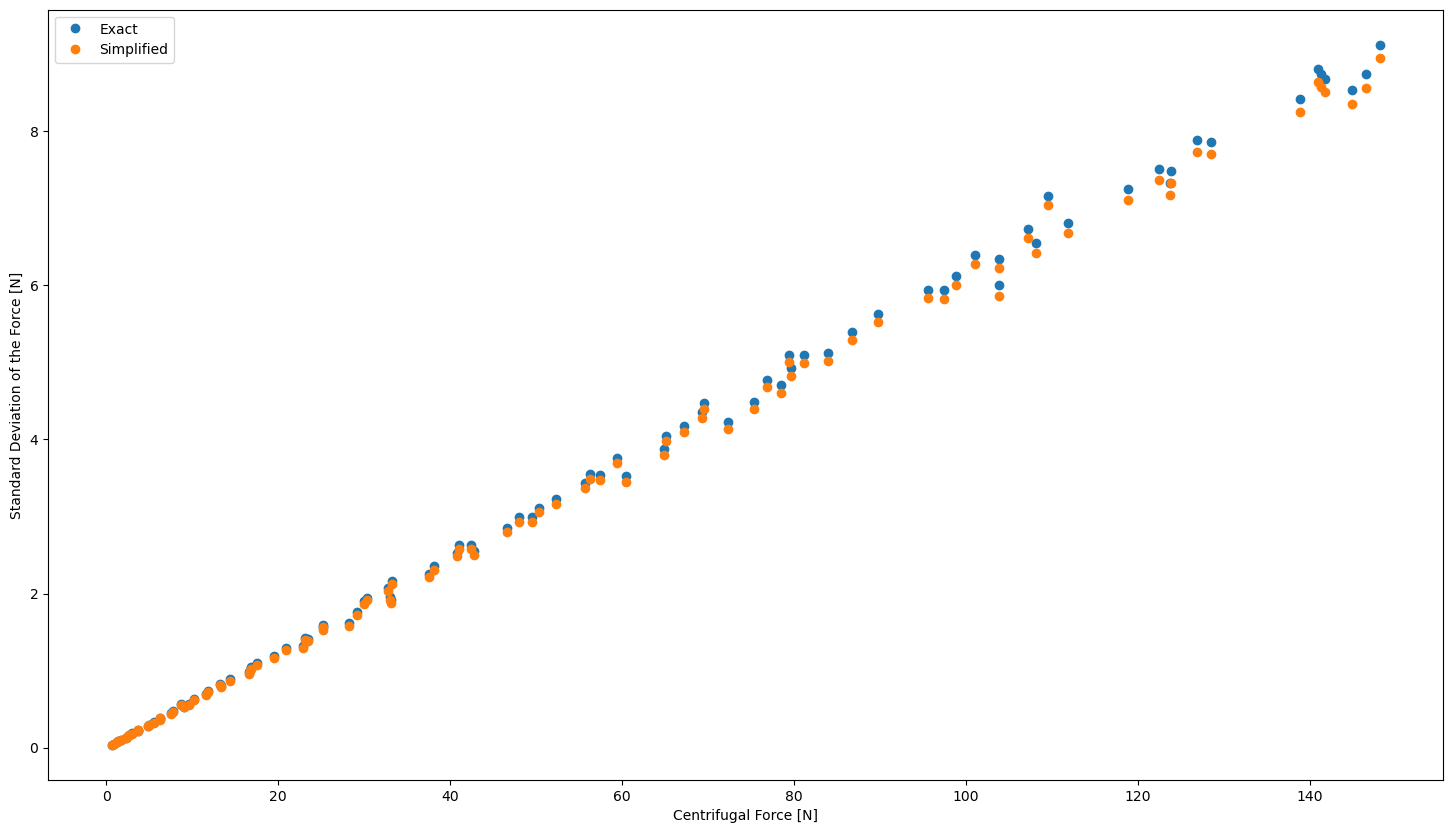

In [83]:
F = (m * v**2) / R
F_std = np.sqrt((v**2/R)**2 * m_std**2 + (2*m*v/R)**2 * v_std**2 + (m*v**2/R**2)**2 * R_std**2)
F_std_s = 2*m*v*v_std/R
fig, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Centrifugal Force [N]')
ax.set_ylabel('Standard Deviation of the Force [N]')
ax.plot(F, F_std, 'o', label='Exact')
ax.plot(F, F_std_s, 'o', label='Simplified')
ax.legend()

## c)

Plotten Sie nun die Kraft zusammen mit den Fehlern in Abhängigkeit von der gemessenen Geschwindigkeit. Sie können dazu `ax.errorbar()` benutzen. 

<ErrorbarContainer object of 3 artists>

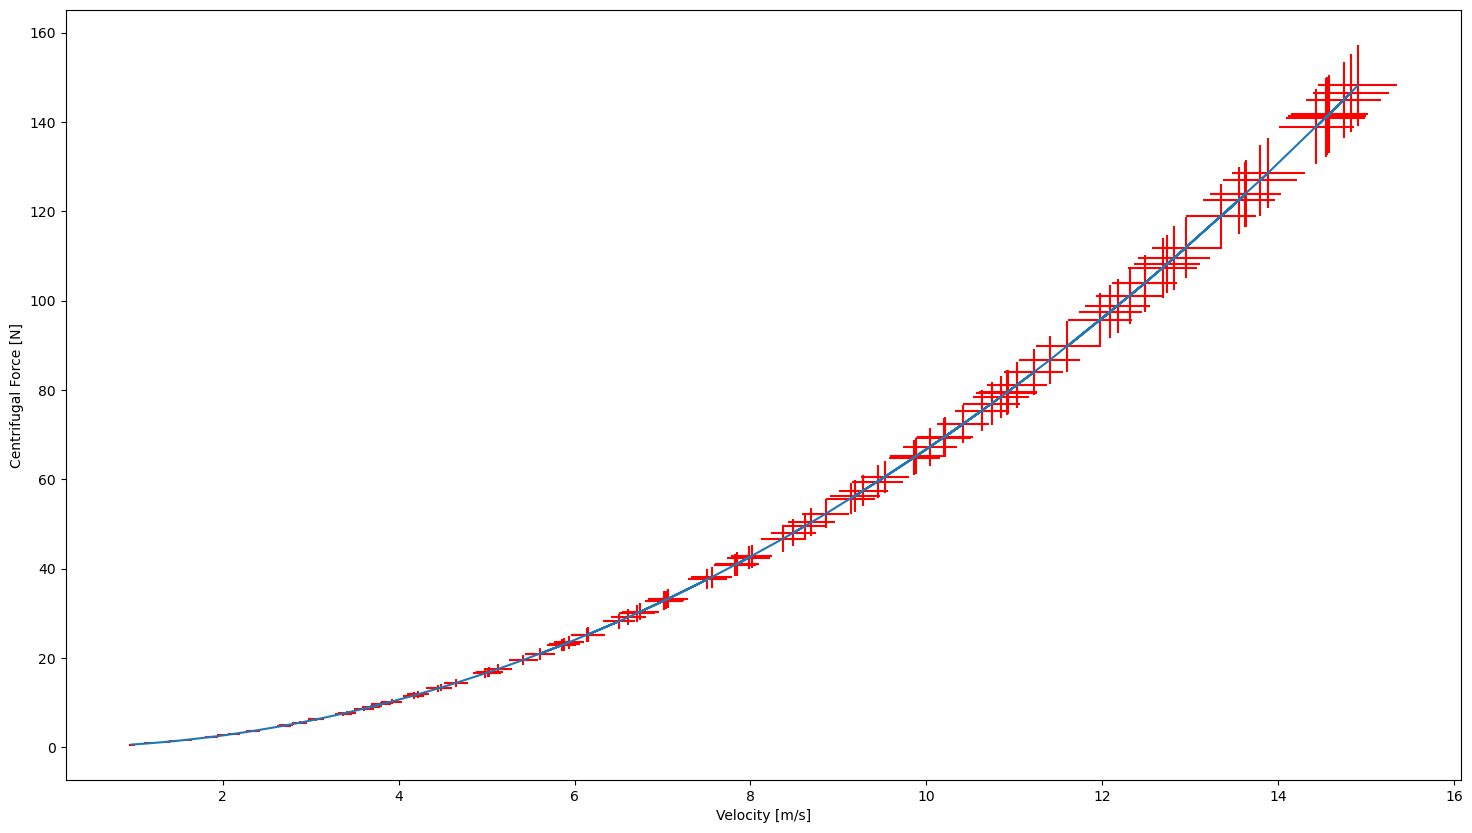

In [78]:
fig, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Velocity [m/s]')
ax.set_ylabel('Centrifugal Force [N]')
ax.errorbar(x=v, y=F, xerr=v_std, yerr=F_std, ecolor='red', label='Exact')
#ax.errorbar(x=v, y=F, xerr=v_std, yerr=F_std_s, ecolor='red', label='Simplified')
#ax.legend()

## Aufgabe 4 Gausssche Fehlerfortpflanzung

Wir betrachten den exponentiellen Zerfall der Population eines beliebigen Systems (z.B. eines radioaktiven Isotops), gegeben durch $N(t) = N_0e^{-\frac{t}{\tau}}$. Um die Zerfallszeit $\tau$ zu bestimmen, wird wiederholt die Anfangspopulation $N_0$ und die Population $N(t)$ nach einer Zeit $t$ gemessen.

$$\tau = -\frac{t}{\log\left(\frac{N}{N_0}\right)}$$

## a)

Berechnen Sie die Unsicherheit $\sigma_\tau$ der Zerfallszeit abhängig von den Unsicherheiten der Population ($\sigma_N$) und der gemessenen Zeit ($\sigma_t$).

$$\sigma_\tau = \sqrt{\left(\frac{1}{\log\left(\frac{N}{N_0}\right)}\right)^2 \cdot \sigma_t^2 + \left(\frac{t}{N\log^2\left(\frac{N}{N_0}\right)}\right)^2 \cdot \sigma_N^2}$$

## b)

Laden Sie nun die Datensätze `Population1.txt` und `Population2.txt`. Sie beinhalten die wiederholte Messung von $N_0$ sowie $N(t=20s)$, wobei der zweite Datensatz mit einem Detektor mit einer grösseren Unsicherheit gemessen wurde. Nehmen sie an, dass die Unsicherheit in der Zeit vernachlässigbar ist und plotten sie die Histogramme der Zerfallskonstanten. Was können Sie beobachten?

### Lösung

In [104]:
data1 = np.loadtxt('Population1.txt', comments='#', delimiter=' ')
data2 = np.loadtxt('Population2.txt', comments='#', delimiter=' ')
n01 = data1[0]
n1 = data1[1]
n02 = data2[0]
n2 = data2[1]

Text(0.5, 0, 'Decay Constant [1/s]')

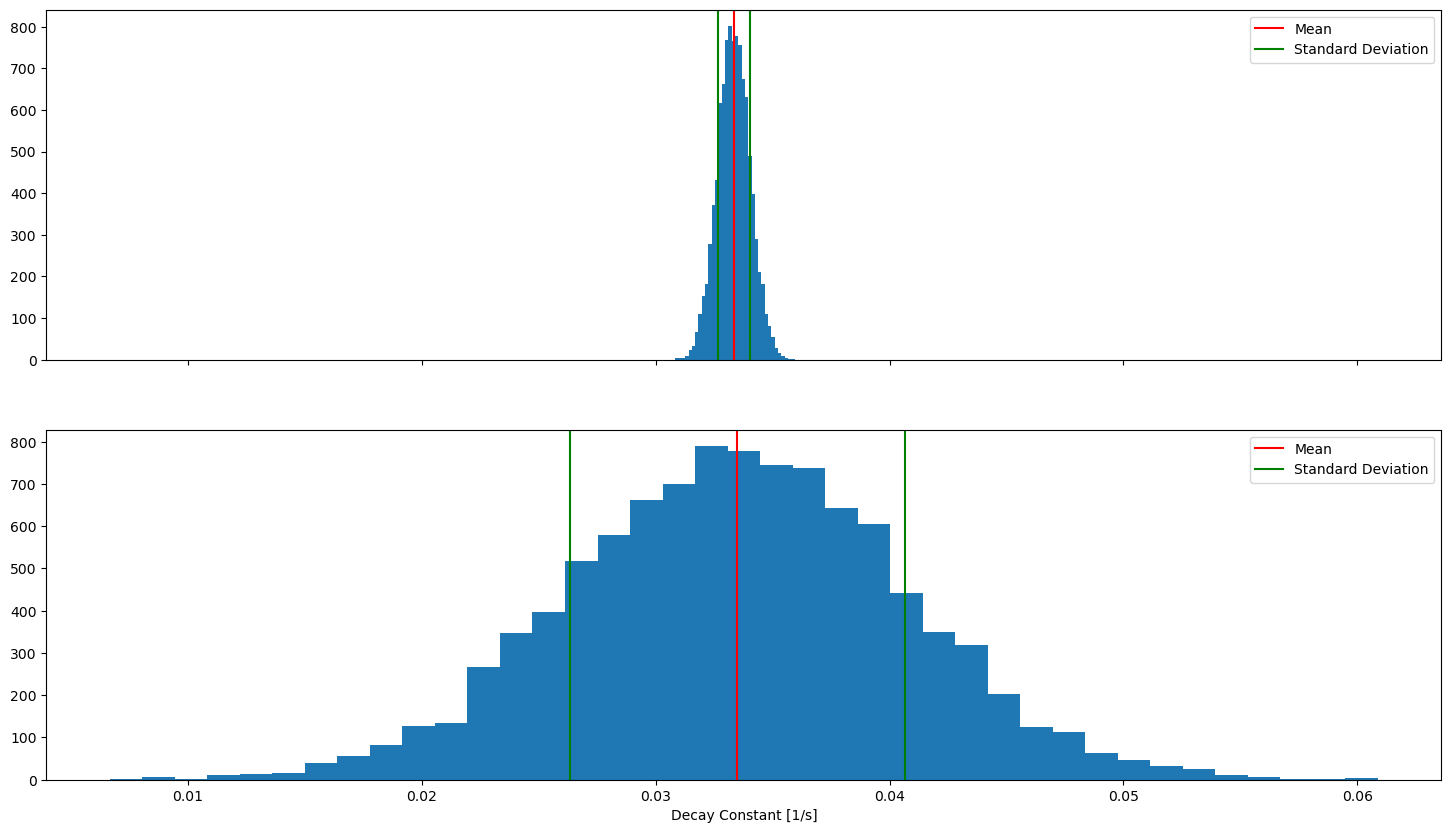

In [106]:
c1 = -np.log(n1/n01)/20
c2 = -np.log(n2/n02)/20

fig, ax = plt.subplots(2, figsize=(18,10), sharex=True)
ax[0].hist(c1, bins='stone')
ax[0].axvline(np.mean(c1), color='red', label='Mean')
ax[0].axvline(np.mean(c1) + np.std(c1), color='green', label='Standard Deviation')
ax[0].axvline(np.mean(c1) - np.std(c1), color='green')
ax[0].legend()
ax[1].hist(c2, bins='stone')
ax[1].axvline(np.mean(c2), color='red', label='Mean')
ax[1].axvline(np.mean(c2) + np.std(c2), color='green', label='Standard Deviation')
ax[1].axvline(np.mean(c2) - np.std(c2), color='green')
ax[1].legend()
ax[1].set_xlabel('Decay Constant [1/s]')